## Data Cleaning Tutorial: Cleaning Data Science Job Postings Dataset

In this tutorial, we will walk through the process of cleaning the "Data Science Job Postings" dataset. The dataset contains information about job postings related to data science scraped from Glassdoor.  The job postings were scrapped sometime in 2021 and are available on Kaggle.

https://www.kaggle.com/datasets/rashikrahmanpritom/data-science-job-posting-on-glassdoor?resource=download

### Step 1: Loading the Dataset

First, let's start by loading the dataset into a pandas DataFrame.

Import the libraries we will be using in this tutorial.

In [1]:
import pandas as pd
import numpy as np

Read the file using the "read_csv" function in the pandas library and store in a dataframe called `ds_df` (data science data frame).

In [2]:
ds_df = pd.read_csv('data files/Uncleaned_DS_jobs.csv')

Inspect the first five rows of the data set using the head() function.

In [3]:
ds_df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


We see an `index` column which isn't really of any use to us so let's remove this before continuing on.

### Step 2: Exploring the Dataset

Before we begin cleaning the data, it's important to understand its structure and identify any potential issues. Let us explore the dataset.

We noticed an `index` column, which will not be of any use to us in our analysis; let us remove this before continuing on.  We can do this with the df.drop() function in pandas; we use `inplace=True` so that the dataframe will save this change for the rest of the notebook.

In [4]:
ds_df.drop('index', axis=1, inplace=True)

Check the dimensions of the data set.

In [5]:
print('Dataset Dimensions:', ds_df.shape)

Dataset Dimensions: (672, 14)


Check the column names to see what kind of data we can analyze.  We can also sort them using the `sort_values()` function so it is a little easier to see what is available.

In [6]:
print('Column Names:\n')
for i in ds_df.columns.sort_values():
    print(i)

Column Names:

Company Name
Competitors
Founded
Headquarters
Industry
Job Description
Job Title
Location
Rating
Revenue
Salary Estimate
Sector
Size
Type of ownership


* **Company Name**: Company that posted the job
* **Competitors**: Companies that are direct competitors
* **Founded**: Year the company was founded or established
* **Headquarters**: Location of company headquarters
* **Industry**: Industry of the company
* **Job Description**: The full job description for the job posted
* **Job Title**: Title of the position in the job posting
* **Location**: Job location
* **Rating**: Rating of that post
* **Revenue**: Total revenue for the company
* **Salary Estimate**: Salary range for that particular job
* **Sector**: Sector of the company
* **Size**: Total number of employees at the company
* **Type of ownership**: Public/private/non-profit

Now that we have an idea of what kind of data we can start analyzing, let us get a better sense of the data completeness and what kind of data types are in the data set.  We have a couple of different ways to do this, but let us use an extremely helpful dataframe function `df.info()`.

In [7]:
print(ds_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          672 non-null    object 
 1   Salary Estimate    672 non-null    object 
 2   Job Description    672 non-null    object 
 3   Rating             672 non-null    float64
 4   Company Name       672 non-null    object 
 5   Location           672 non-null    object 
 6   Headquarters       672 non-null    object 
 7   Size               672 non-null    object 
 8   Founded            672 non-null    int64  
 9   Type of ownership  672 non-null    object 
 10  Industry           672 non-null    object 
 11  Sector             672 non-null    object 
 12  Revenue            672 non-null    object 
 13  Competitors        672 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 73.6+ KB
None


This tells us a great deal about the data we'll be working with.  We see that are no null values anywhere in the data set, which is normally something that we would need to handle, either via extrapolation or removing those records.  Luckily for us, we do not need to worry about that with this data set so we will not cover that in this tutorial.*

We see that, for the most part, the data types are `object` which in Python terms means they will be string values.  The **Rating** column is a float so there must be decimals in the ratings.  The **Founded** column is an integer which means that this is likely simply just the year the company was founded.

What is unfortunate is that we do not have *when* the job posting was placed in this data set, so we cannot get a sense of how old this data is now.  Considering the data set was published in 2021, we can infer that it was scrapped around that time (and this is one of the challenges of getting publicly available data).

*If we did want to deal with missing values, there are a few handy functions that can be used.

For example, we could drop columns with high missing value percentage by setting a threshold and using the `dropna()`

`threshold = 0.75`

`ds_df = ds_df.dropna(thresh=threshold * len(ds_df), axis=1)`

Or we could fill in empty values with our own fix using the `fillna()` function.

`ds_df['Sector'] = data['Sector'].fillna('Not Available')`

### Step 3: Remove duplicate rows

Since we don't have to deal with missing values, let us see if there are any duplicate records and remove those. We can do this using the `df.duplicated()` function and summing to get the count of duplicate rows.

In [8]:
ds_df.duplicated().sum()

13

Not too many duplicates, but let us remove them by running `df.drop_duplicates()`.  We will also reset the index on the data frame since we're dropping rows and do not want to lose track of the new row count.

In [9]:
ds_df.drop_duplicates(inplace=True)

Print the shape to see the new dataframe dimensions and confirm the thirteen duplicate rows are gone.

In [10]:
ds_df.shape

(659, 14)

### Step 4: Cleaning and Transforming Data

Now, let's clean and transform the data to ensure consistency and uniformity.

To start, let us look at the first five rows of data to see if there are any manipulations or clean up steps we should take before proceeding.

In [11]:
ds_df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


There are a few observations we can make from the first five rows in the data set.

1.  The Salary Estimate column has a lot of extra characters that we can clean up, and we could format this in a better way to showcase a range.
2.  The Company Name column has a newline `\n` & the company rating following it (probably due to a parsing error); we should remove anything after the `\n` so we only have the company name.
3.  The Revenue column is also a bit of a mess, containing both revenue ranges and Unknowns so we're not completely done with N/As!
4.  Finally, the Competitors column has some `-1`s; this is probably supposed to be an empty value and we'll take a look to see how many rows this affects before we decide what to do.

Let us start with the company name since this will be a pretty straightforward fix.  We can start by just printing the column out to confirm the `\n#.#` appears on every row.

In [12]:
ds_df['Company Name']

0               Healthfirst\n3.1
1                   ManTech\n4.2
2            Analysis Group\n3.8
3                   INFICON\n3.5
4        Affinity Solutions\n2.9
                 ...            
667                TRANZACT\n3.6
668                         JKGT
669                   AccessHope
670    ChaTeck Incorporated\n5.0
671           1-800-Flowers\n2.7
Name: Company Name, Length: 659, dtype: object

Pandas comes with a variety of different ways to do this; we can use the `str.split()` method to pull apart each element in the Company Name column.  Then we can overwrite the original column by assigning it back to the column.

`ds_df['Company Name'].str.split('\n', expand=True)` We split on the \n character, expand the columns so it splits them into two.

In [13]:
ds_df['Company Name'].str.split('\n', expand=True)

,0,1
0,Healthfirst,3.1
1,ManTech,4.2
2,Analysis Group,3.8
3,INFICON,3.5
4,Affinity Solutions,2.9
...,...,...
667,TRANZACT,3.6
668,JKGT,None
669,AccessHope,None
670,ChaTeck Incorporated,5.0


Then we grab the company name by only selecting the first element, which in Python starts with `[0]`.

In [14]:
ds_df['Company Name'] = ds_df['Company Name'].str.split('\n', expand=True)[0]

For all of our transformations, we want to print out the results of our work to confirm our code is performing the transformations as we expect.

In [15]:
ds_df['Company Name']

0               Healthfirst
1                   ManTech
2            Analysis Group
3                   INFICON
4        Affinity Solutions
               ...         
667                TRANZACT
668                    JKGT
669              AccessHope
670    ChaTeck Incorporated
671           1-800-Flowers
Name: Company Name, Length: 659, dtype: object

Nicely done!

Let us now look at the Industry column and see if there is anything strange happening there.  We can do this very quickly by counting the values to see what comes up.

In [16]:
ds_df['Industry'].value_counts()

Industry
Biotech & Pharmaceuticals                   66
IT Services                                 61
-1                                          60
Computer Hardware & Software                56
Aerospace & Defense                         46
Enterprise Software & Network Solutions     43
Consulting                                  38
Staffing & Outsourcing                      36
Insurance Carriers                          28
Internet                                    27
Advertising & Marketing                     23
Health Care Services & Hospitals            21
Research & Development                      17
Federal Agencies                            16
Investment Banking & Asset Management       13
Banks & Credit Unions                        8
Lending                                      7
Energy                                       5
Consumer Products Manufacturing              5
Telecommunications Services                  5
Insurance Agencies & Brokerages              4
Food

We see a -1 in this data set.  What we will soon see is that this data set is using a -1 in place of a NULL or empty value.  So we will need to replace this -1 with a more suitable value to help our analysis.

For this example, let us transform the -1 with 'Unknown Industry' using the `str.replace()` function.

In [17]:
ds_df['Industry'] = ds_df['Industry'].str.replace('-1', 'Unknown Industry')

Let us confirm the transformation was successful.  We can just look at the top ten industries to confirm it worked.

In [18]:
ds_df['Industry'].value_counts()[:10]

Industry
Biotech & Pharmaceuticals                  66
IT Services                                61
Unknown Industry                           60
Computer Hardware & Software               56
Aerospace & Defense                        46
Enterprise Software & Network Solutions    43
Consulting                                 38
Staffing & Outsourcing                     36
Insurance Carriers                         28
Internet                                   27
Name: count, dtype: int64

Great!  That looks much better.

Next, let us look at the Salary Estimate column.  That will be a very useful column for analysis but in its current format it is a bit of a mess.  We can start by counting how many different salary ranges there are and also see what we will need to strip out.

In [19]:
ds_df['Salary Estimate'].value_counts()

Salary Estimate
$75K-$131K (Glassdoor est.)     32
$79K-$131K (Glassdoor est.)     32
$99K-$132K (Glassdoor est.)     32
$137K-$171K (Glassdoor est.)    30
$90K-$109K (Glassdoor est.)     28
$56K-$97K (Glassdoor est.)      22
$79K-$106K (Glassdoor est.)     22
$90K-$124K (Glassdoor est.)     22
$92K-$155K (Glassdoor est.)     21
$138K-$158K (Glassdoor est.)    21
$128K-$201K (Glassdoor est.)    21
$212K-$331K (Glassdoor est.)    21
$69K-$116K (Glassdoor est.)     21
$124K-$198K (Glassdoor est.)    21
$112K-$116K (Glassdoor est.)    21
$91K-$150K (Glassdoor est.)     21
$101K-$165K (Glassdoor est.)    21
$110K-$163K (Glassdoor est.)    20
$79K-$147K (Glassdoor est.)     20
$145K-$225K(Employer est.)      20
$31K-$56K (Glassdoor est.)      20
$141K-$225K (Glassdoor est.)    20
$66K-$112K (Glassdoor est.)     20
$80K-$132K (Glassdoor est.)     20
$87K-$141K (Glassdoor est.)     20
$105K-$167K (Glassdoor est.)    20
$79K-$133K (Glassdoor est.)     19
$71K-$123K (Glassdoor est.)     19
$122

Looks like our best bet here is to do a regex to strip out any of the non-numeric values, then create two columns with the minimum and maximum salaries for each row.  We can use the `str.extract()` function with a simple regex to only pull the first element in the salary range, which is the minimum salary.

We can also multiply the salary number by 1000 since the salary range is in the thousands for a more accurate representation.

In [20]:
ds_df['Min Salary'] = ds_df['Salary Estimate'].str.extract('\$(\d+)K').astype(float)*1000

Do the same with the Maximum Salary, but this time pulling out the second element in the salary range to get the maximum salary.  We also multiply this number by 1000.

In [21]:
ds_df['Max Salary'] = ds_df['Salary Estimate'].str.extract(r'\$(\d+)K-\$(\d+)K')[1].astype(float)*1000

Print out a few elements from each newly created column to confirm the transformations were successful.

In [22]:
ds_df[['Min Salary', 'Max Salary']]

,Min Salary,Max Salary
0,137000.0,171000.0
1,137000.0,171000.0
2,137000.0,171000.0
3,137000.0,171000.0
4,137000.0,171000.0
...,...,...
667,105000.0,167000.0
668,105000.0,167000.0
669,105000.0,167000.0
670,105000.0,167000.0


Looks much better!  Now we can do analysis on the salary ranges more effectively.

Now that we have these columns in a better format for performing calculations, let us do a simple one to add an Average Salary column to the data set so we can slice by Minimum, Maximum, and Average Salary by job.

To do this, we can use the `mean()` function on our two columns and specify `axis=1` so the calculation is peformed on every row.  If we do not make that specification in the function call, it will give us the average for all of the minimum and maximum salaries which is a good summary statistic but not our intention.

In [23]:
ds_df['Average Salary'] = ds_df[['Min Salary', 'Max Salary']].mean(axis = 1)

Print out a few sample values to confirm the average calculation performed on every row and looks good.

In [24]:
ds_df['Average Salary']

0      154000.0
1      154000.0
2      154000.0
3      154000.0
4      154000.0
         ...   
667    136000.0
668    136000.0
669    136000.0
670    136000.0
671    136000.0
Name: Average Salary, Length: 659, dtype: float64

Now that we have salary covered, let us look at the Size column by printing the value counts.

In [25]:
ds_df['Size'].value_counts()

Size
51 to 200 employees        134
1001 to 5000 employees     104
1 to 50 employees           86
201 to 500 employees        84
10000+ employees            80
501 to 1000 employees       77
5001 to 10000 employees     61
Unknown                     17
-1                          16
Name: count, dtype: int64

We notice that employees is repeated on every line and there are a few -1s that we should take care of.  Instead of leaving those as -1, we can transform them to "Unknown" because our intuition tells us that this was likely a blank value.

In [26]:
ds_df['Size'] = ds_df['Size'].str.replace('-1', 'Unknown')

Then we will remove 'employees` from all of the entries so it looks a little better

In [27]:
ds_df['Size'] = ds_df['Size'].str.split(' employees', expand=True)[0]

Print out the value counts now to see if the transformations were successful.

In [28]:
ds_df['Size'].value_counts()

Size
51 to 200        134
1001 to 5000     104
1 to 50           86
201 to 500        84
10000+            80
501 to 1000       77
5001 to 10000     61
Unknown           33
Name: count, dtype: int64

Looks much better now!

Let us look at the year the company was founded and use this to calculate how old the company is.  To start, we should see if there are any strange values in the Founded column by also looking value counts.

In [29]:
ds_df['Founded'].value_counts()

Founded
-1       107
 2012     34
 2011     24
 2010     22
 1996     22
        ... 
 1820      1
 1952      1
 1959      1
 1894      1
 1962      1
Name: count, Length: 103, dtype: int64

The -1 is back; because this column is an integer, and we want to use it to perform a simple calculation to subtract it from the current year of 2023, we can just replace it with a 0, then peform the calculation.

In [30]:
ds_df['Founded'] = ds_df['Founded'].replace(-1, 0)

To do the calculation correctly, we need to account for all of the companies that we set to 0.  So we can build a simple lambda function to say if the year = 0 then just set the age of the company to 0, otherwise subtract it from 2023 to get the number of years of the company.

Lambda functions* are extremely important and powerful for data manipulation; the general syntax for performing a lambda function on a column is:

`df.column.apply(lambda <perform this specific transformation to all elements in this list>`)

*You can use these to do any sort of transformation you require that may not already exist in a library.  Learning how to build these is really helpful!

In [31]:
ds_df['Age of Company'] = ds_df['Founded'].apply(lambda x: 2023-x if x != 0 else x)

Print the results to see if the transformations worked.

In [32]:
ds_df['Age of Company'].value_counts()

Age of Company
0      107
11      34
12      24
13      22
27      22
      ... 
203      1
71       1
64       1
129      1
61       1
Name: count, Length: 103, dtype: int64

Looks good!  There's a lot of young companies in this data set; perhaps data science still has some room for growth in the near future!

For the sake of time and brevity, we will perform a few more clean up items before we try visualizing the data.  Let us look at the Ratings column and see if anything can be transformed there.

In [33]:
ds_df['Rating'].value_counts()

Rating
 3.5    58
 4.0    41
 3.3    41
 3.9    40
-1.0    39
 3.8    39
 3.7    38
 5.0    36
 4.5    32
 3.6    31
 3.4    31
 4.2    29
 4.1    25
 4.4    24
 4.7    22
 3.2    20
 4.8    20
 4.3    14
 2.9    14
 4.6    12
 3.1    12
 4.9    10
 2.7    10
 3.0     7
 2.6     4
 2.8     3
 2.5     2
 2.2     1
 2.4     1
 2.3     1
 2.1     1
 2.0     1
Name: count, dtype: int64

We see that -1 appear again, and again know that it is related to it being an empty value from the data set.  So we have a couple of approaches we can take.  

* We could filter out any rows with a -1 but then we lose out on some of the other data that would be useful for analysis.
* We could impute a value here based on the mean of the Rating column.
* We could impute a NULL or empty value since the data type is a float.

Let us go with the last approach here; this is the safest bet to accurately represent that the Ratings data is missing for those rows and will not affect the min, max, and average calculations.

In [34]:
ds_df['Rating'] = ds_df['Rating'].replace(-1, np.NaN)

Show the average rating now that we've replaced the -1s with NULL.

In [35]:
print('The average Rating after replacing -1 with NULL is:', ds_df['Rating'].mean().astype(str))

The average Rating after replacing -1 with NULL is: 3.8812903225806448


Next up is taking a look at the job locations and seeing if there is any strange or missing data there.

In [36]:
ds_df['Location'].value_counts()

Location
San Francisco, CA    58
New York, NY         50
Washington, DC       26
Boston, MA           24
Chicago, IL          22
                     ..
Lehi, UT              1
Culver City, CA       1
Lake Oswego, OR       1
New Orleans, LA       1
Irwindale, CA         1
Name: count, Length: 207, dtype: int64

Nothing major stands out here just yet.  So let's start by pulling out just the state abbrevations and disregarding the cities.

In [37]:
ds_df['Location'].apply(lambda x: x.split(",")[-1]).value_counts()

Location
 CA              154
 VA               89
 MA               62
 NY               52
 MD               40
 IL               30
 DC               26
 TX               17
 WA               16
 OH               14
 PA               12
 MO               12
United States     11
 NJ               10
 CO               10
 NC                9
 GA                9
 TN                8
 FL                8
 OK                6
 WI                6
Remote             5
 IN                5
 MI                5
 CT                4
 AL                4
 MN                4
 AZ                4
 NE                3
 IA                3
 RI                2
New Jersey         2
 SC                2
 OR                2
 UT                2
Utah               2
 NH                2
 MS                1
 LA                1
 KS                1
Texas              1
 DE                1
California         1
 WV                1
Name: count, dtype: int64

And now we see that a few of the job locations have the full state name or USA in them.  So let us create a simple function to deal with these.

Let's start by creating a state column so we have do not lose the original Location column.

In [38]:
ds_df['Job State'] = ds_df['Location'].apply(lambda x: x.split(",")[-1].strip())

We could probably do this a little more programmatically if we had multiple states we had to change by using a simple mapping table, but for the purpose of this exercise we will keep it simple and just change the values to ones that seem appropriate.

* California to CA
* New Jersey to NJ
* Texas to TX
* Utah to UT
* United States to USA
* Remote to All

In [39]:
ds_df['Job State'] = ds_df['Job State'].replace(['California', 'New Jersey', 'Texas', 
                                                 'Utah', 'United States', 'Remote'],
                                                      ['CA', 'NJ', 'TX', 'UT', 'USA', 'All'])

In [40]:
ds_df['Job State'].value_counts()

Job State
CA     155
VA      89
MA      62
NY      52
MD      40
IL      30
DC      26
TX      18
WA      16
OH      14
PA      12
NJ      12
MO      12
USA     11
CO      10
GA       9
NC       9
FL       8
TN       8
OK       6
WI       6
MI       5
All      5
IN       5
AZ       4
CT       4
MN       4
AL       4
UT       4
IA       3
NE       3
SC       2
OR       2
RI       2
NH       2
MS       1
LA       1
KS       1
DE       1
WV       1
Name: count, dtype: int64

A few more things to clean up and then we can save the data set, then do some quick visualizations to bring it all together.  Let's start by looking at the Job Titles in each of the descriptions and see if we can do some quick work on them.

We start by looking at what the counts are for the Job Title column.

In [41]:
ds_df['Job Title'].value_counts()

Job Title
Data Scientist                                            326
Data Engineer                                              26
Senior Data Scientist                                      19
Machine Learning Engineer                                  15
Data Analyst                                               12
                                                         ... 
Data Science Instructor                                     1
Business Data Analyst                                       1
Purification Scientist                                      1
Data Engineer, Enterprise Analytics                         1
AI/ML - Machine Learning Scientist, Siri Understanding      1
Name: count, Length: 172, dtype: int64

Purification Scientist sounds like a very interesting job title, but probably won't be very helpful for us to analyze.  It looks like the vast majority of the postings use the first five titles or some form of them.

The best way to determine what the true job title for each listing is is to:

* Set all of the characters in the job title string to lower case
* Look to see if the job titles we are interesting in analyzing appears in the Job Title text
* Return the job title with the appropriate casing
* Set all others to Unknown Job Title

We are doing this to simplify the analysis a bit and have bigger buckets from which to work with.

To do this, we can create a super simple function and then apply it to the Job Title column.

In [42]:
def job_title_transformation(title):
    title = title.lower()

    if 'data scientist' in title:
        return 'Data Scientist'
    elif 'data analyst' in title:
        return 'Data Analyst'
    elif 'data engineer' in title:
        return 'Data Engineer'
    elif 'machine learning' in title:
        return 'Machine Learning Engineer'
    elif 'director' in title:
        return 'Director'
    elif 'manager' in title:
        return 'Manager'
    elif 'vice president' in title:
        return 'Vice President'
    elif 'analyst' in title:
        return 'Data Analyst'
    else:
        return 'Unknown Job Title'

Apply the function to the Job Title column and create a new column called Job Title Transformed.

In [43]:
ds_df['Job Title Transformed'] = ds_df['Job Title'].apply(job_title_transformation)

Confirm the new column looks as expected.

In [44]:
ds_df['Job Title Transformed'].value_counts()

Job Title Transformed
Data Scientist               444
Unknown Job Title             68
Data Analyst                  55
Data Engineer                 46
Machine Learning Engineer     35
Manager                        7
Director                       3
Vice President                 1
Name: count, dtype: int64

Much better!  We also see that there only 79 jobs that are in that miscellaneous bucket so it helps to bucket them all.

The last step in the transformation process: search of the most popular skills in the Job Description column.  To fit the theme of the book, we will pick some likely job skills and technologies that we presume we will see come up pretty often.

* Python
* Spark
* SQL
* Excel
* Tableau
* Power BI
* AWS

In order to do this effectively, we will need to create boolean columns that indicate whether any of the skills shows up in the job description.  We can do this, once again, with a simple function.

In [45]:
def create_flag_columns(df, columns):
    for column in columns:
        df[column.title()] = df['Job Description'].str.lower().str.contains(column).astype(int)

columns = ["python", "excel", "tableau", "power bi", "aws", "sql", "spark"]

create_flag_columns(ds_df, columns)

The create_flag_columns function takes two parameters: df (the DataFrame) & columns (a list of column names to create flags for.
The function iterates over each column in the columns list.
For each column, it converts the values in that column to lowercase using `str.lower()`, enabling case-insensitive comparisons.
It then checks if the column name is present in the lowercase column values using `str.contains(column)`.
The result of `str.contains()` is cast to int using `astype(int)`, converting True to 1 and False to 0.
The resulting binary values are assigned to the respective columns in the DataFrame df.

In the example usage, we pass the DataFrame ds_df and a list of column names columns to the create_flag_columns function. This will create flag columns for each specified column in ds_df, indicating whether the corresponding keyword is present in the respective column's values.

In [46]:
ds_df['Python'].value_counts()

Python
1    479
0    180
Name: count, dtype: int64

Let us check to make sure all of the new columns were created.

In [47]:
ds_df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Min Salary', 'Max Salary', 'Average Salary', 'Age of Company',
       'Job State', 'Job Title Transformed', 'Python', 'Excel', 'Tableau',
       'Power Bi', 'Aws', 'Sql', 'Spark'],
      dtype='object')

Let us print the first five rows of the data frame and confirm our transformations have been applied succesfully.

In [48]:
ds_df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Age of Company,Job State,Job Title Transformed,Python,Excel,Tableau,Power Bi,Aws,Sql,Spark
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000,1993,Nonprofit Organization,...,30,NY,Data Scientist,0,0,0,0,1,0,0
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000,1968,Company - Public,...,55,VA,Data Scientist,0,0,0,0,0,1,0
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000,1981,Private Practice / Firm,...,42,MA,Data Scientist,1,1,0,0,1,0,0
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000,2000,Company - Public,...,23,MA,Data Scientist,1,1,0,0,1,1,0
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200,1998,Company - Private,...,25,NY,Data Scientist,1,1,0,0,0,1,0


In this step, we applied various cleaning and transformation operations to specific columns. We replaced salary ranges with a unified format, extracted minimum and maximum salary values, cleaned and transformed the 'Rating', 'Size', 'Founded', 'Type of ownership', 'Industry', and 'Sector' columns using regular expressions and string manipulations.

### Step 5: Saving the Cleaned Dataset

Let us save the cleaned dataset to a new file for further analysis.

By executing this code, we will save the cleaned dataset to a new CSV file called 'Glassdoor_DS_Jobs_Final.csv'.

In [49]:
# Save the cleaned dataset to a new CSV file
ds_df.to_csv('data files/Glassdoor_DS_Jobs_Final.csv', index=False)

Congratulations! You have successfully completed the data cleaning process for the "Data Science Job Postings" dataset. The cleaned dataset can now be used for further analysis or machine learning tasks.

Remember that data cleaning is an iterative process, and you can apply additional cleaning techniques based on the specific requirements of your analysis.

### Step 6: Load the Cleaned Dataset 

Let us load the cleaned dataset and do some simple visualizations to showcase our data engineering efforts.  Instead of loading the original data file, now we can load the cleaned data set we saved in the previous step.

In [50]:
ds_vis_df = pd.read_csv('data files/Glassdoor_DS_Jobs_Final.csv')

Confirm the data set looks like the one we just saved by checking the first few rows.

In [51]:
ds_vis_df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Age of Company,Job State,Job Title Transformed,Python,Excel,Tableau,Power Bi,Aws,Sql,Spark
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000,1993,Nonprofit Organization,...,30,NY,Data Scientist,0,0,0,0,1,0,0
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000,1968,Company - Public,...,55,VA,Data Scientist,0,0,0,0,0,1,0
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000,1981,Private Practice / Firm,...,42,MA,Data Scientist,1,1,0,0,1,0,0
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000,2000,Company - Public,...,23,MA,Data Scientist,1,1,0,0,1,1,0
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200,1998,Company - Private,...,25,NY,Data Scientist,1,1,0,0,0,1,0


### Step 8: Create some visualizations to summarize the data

Let us do some simple visualizations to summarize the data and draw some simple conclusions.  Let's start by importing the libraries we will need to create the visualizations.

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

To start, let us create a simple function to generate a bar plot with to showcase which skills are being called out, based on the boolean columns we created in the last step of the data engineering process.

In [53]:
def plot_skill_appearances(df, skill_columns):
    counts_1 = [len(df.loc[df[column] == 1, column]) for column in skill_columns]
    counts_0 = [len(df.loc[df[column] == 0, column]) for column in skill_columns]

    x = skill_columns
    y1 = counts_1
    y2 = counts_0

    sns.set()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=x, y=y1, color='b')
    sns.barplot(x=x, y=y2, bottom=y1, color='r')
    plt.xlabel('Technical Skill')
    plt.ylabel('Skill Appearances')
    plt.show()

The function plot_skill_appearances takes two parameters: `df` (the DataFrame) and `skill_columns` (a list of skill columns to plot).

* It uses list comprehensions to compute the counts of appearances for each skill (1s and 0s) in the DataFrame.
* The resulting counts are stored in counts_1 and counts_0.
* The x variable is set to skill_columns to define the x-axis labels.
* The y1 and y2 variables are set to the counts of appearances for 1s and 0s, respectively.
* The function then creates a bar plot using `plt.bar()`, where y1 represents the bars for 1s and y2 represents the bars for 0s. The bottom parameter is used to stack the bars.
* Finally, the plot is customized with axis labels and displayed using `plt.show()`.

Then we call the function on the data frame to show the bar graph with the skills columns we generated earlier.

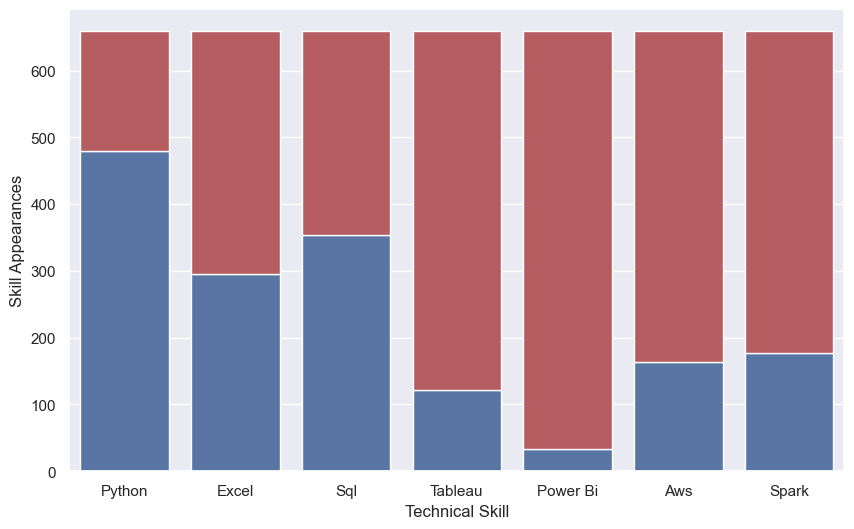

In [54]:
skills = ['Python', 'Excel', 'Sql', 'Tableau', 'Power Bi', 'Aws', 'Spark']
plot_skill_appearances(ds_vis_df, skills)

##### What sort of conclusions can you draw from this output?  Feel free to jot some down.

Next, let us look at how the job titles are distributed in this data set.  We can do a simple pie chart to demonstrate the percentage of each job title.

In [55]:
def plot_job_title_distribution(df, column):
    category_distribution = df[column].value_counts(normalize=True)

    # Create a pie chart using seaborn
    plt.figure(figsize=(8, 8))
    sns.set()
    category_distribution.plot(kind='pie', autopct='%1.1f%%')
    plt.title('Job Title Distribution')
    plt.ylabel('')
    plt.show()

The function plot_category_distribution takes two parameters: df (the DataFrame) and column_name (the column containing the job categories to visualize).

* It calculates the proportion of jobs in each category using value_counts(normalize=True).
* The resulting proportions are used to create a pie chart using Seaborn.
* The Seaborn styling is set using sns.set() to enhance the aesthetics of the plot.
* Finally, the plot is displayed using plt.show()

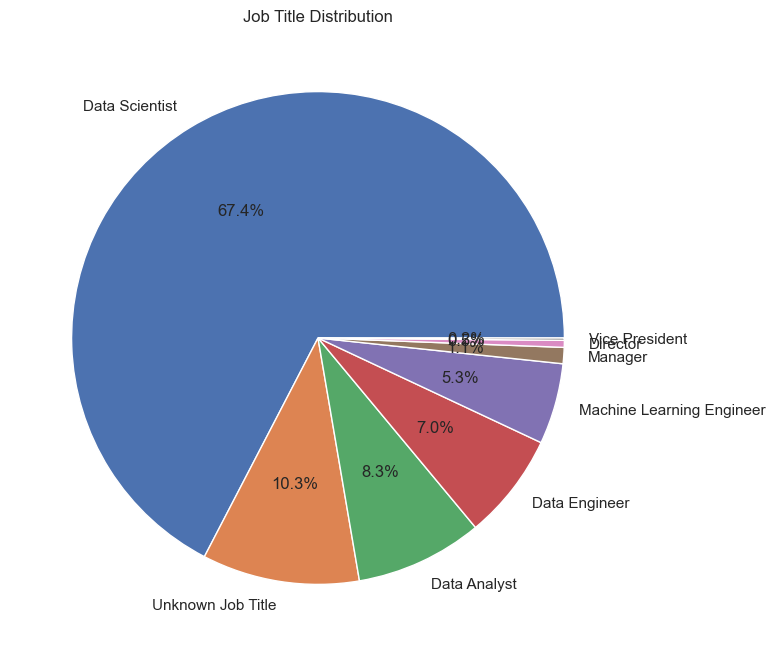

In [56]:
plot_job_title_distribution(ds_vis_df, 'Job Title Transformed')

#### What kinds of conclusions can be drawn from this?  Feel free to jot them down.

Next, let us plot the top ten industries that appear in the Glassdoor results.

In [57]:
def plot_top_industries(df, n=10):
    top_industries = df['Industry'].value_counts().nlargest(n).index
    data_filtered = df[df['Industry'].isin(top_industries)]

    plt.figure(figsize=(12, 6))
    sns.countplot(data=data_filtered, y='Industry', order=top_industries)
    plt.title(f'Top {n} Industries')
    plt.xlabel('Count')
    plt.ylabel('Industry')
    plt.show()

The function `plot_top_industries` takes a DataFrame (df) and an optional parameter n (defaulted to 10) as input.

* It calculates the top n industries based on the frequency using `value_counts().nlargest(n).index`.
* The DataFrame is filtered to include only the rows with the top industries.
* The countplot is created using `sns.countplot()` from Seaborn, with data_filtered as the input data and y='Industry' to specify the column for the industries.
* The order parameter is set to top_industries to order the bars according to the top industries.
* The figure size, title, x-label, and y-label are labeled to help provide context.
* Finally, the plot is displayed using `plt.show()`.

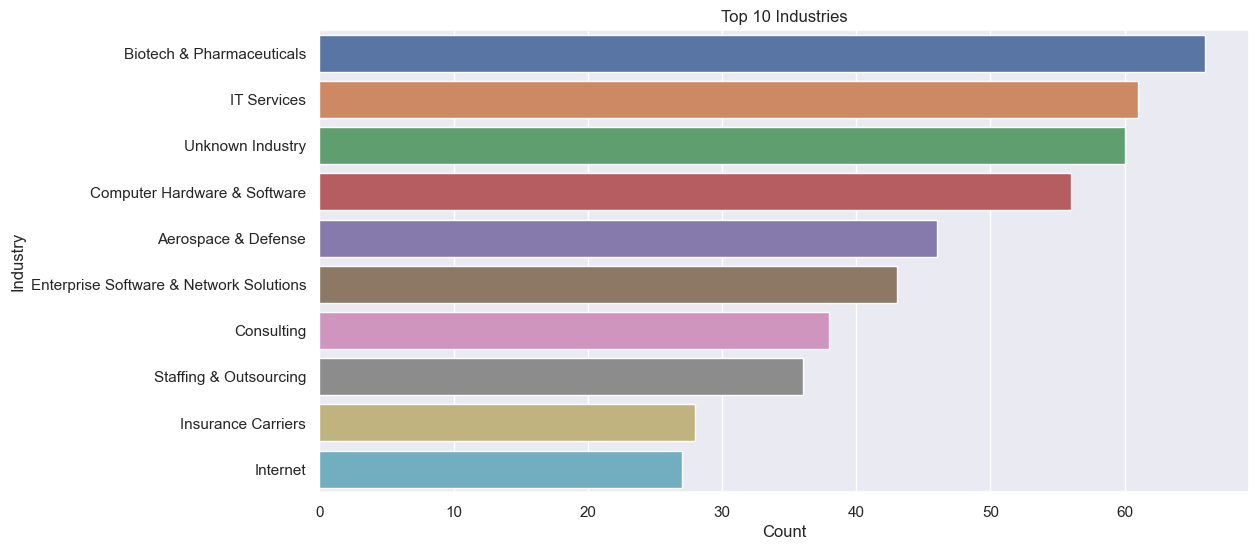

In [58]:
plot_top_industries(ds_vis_df)

#### What kinds of conclusions can be drawn from this visualization?  Jot some down.

Next, let us take a look at the salary information and get an idea of the distribution of salaries.

In [59]:
def plot_salary_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='Average Salary', kde=True)
    plt.title('Distribution of Salaries')
    plt.xlabel('Average Salary')
    plt.ylabel('Count')
    plt.show()

The function plot_salary_distribution takes a DataFrame (df) as input.
* The histogram plot is created using `sns.histplot()` from Seaborn.
* The x parameter is set to 'Average Salary' to specify the column for the salary values.
* Setting kde=True adds a kernel density estimate plot to the histogram.
* Finally, the plot is displayed using `plt.show()`.

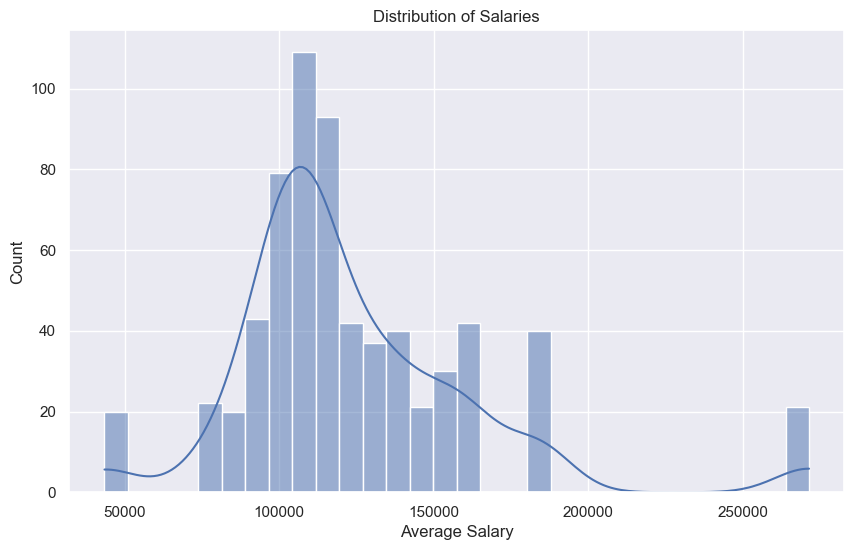

In [60]:
plot_salary_distribution(ds_vis_df)

#### What sorts of conclusions can be drawn from the visualization above?  Jot down some ideas.

In [61]:
def plot_average_salary_by_title(df):
    filtered_data = df[df['Job Title Transformed'] != 'Unknown Job Title']
    sorted_data = filtered_data.sort_values('Average Salary', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(data=sorted_data, x='Job Title Transformed', y='Average Salary')
    plt.title('Average Salary by Job Title')
    plt.xlabel('Job Title')
    plt.ylabel('Average Salary')
    plt.xticks(rotation=45)
    plt.show()

The function plot_average_salary_by_title takes a DataFrame (df) as input.

* The bar plot is created using `sns.barplot()` from Seaborn.
* The data is filtered to exclude rows with "Unknown Job Title" using filtered_data = data[data['Job Title'] != 'Unknown Job Title'].
* The filtered data is then sorted by the highest average salary in descending order using sorted_data = filtered_data.sort_values('Average Salary', ascending=False).
* The x parameter is set to 'Job Title' to specify the column for the job titles, and the y parameter is set to 'Average Salary' to specify the column for the average salary values.
* The figure size, title, x-label, and y-label are added to provide context, and the x-axis labels are rotated by 90 degrees using `plt.xticks(rotation=90)` to avoid overlapping.
* Finally, the plot is displayed using `plt.show()`.

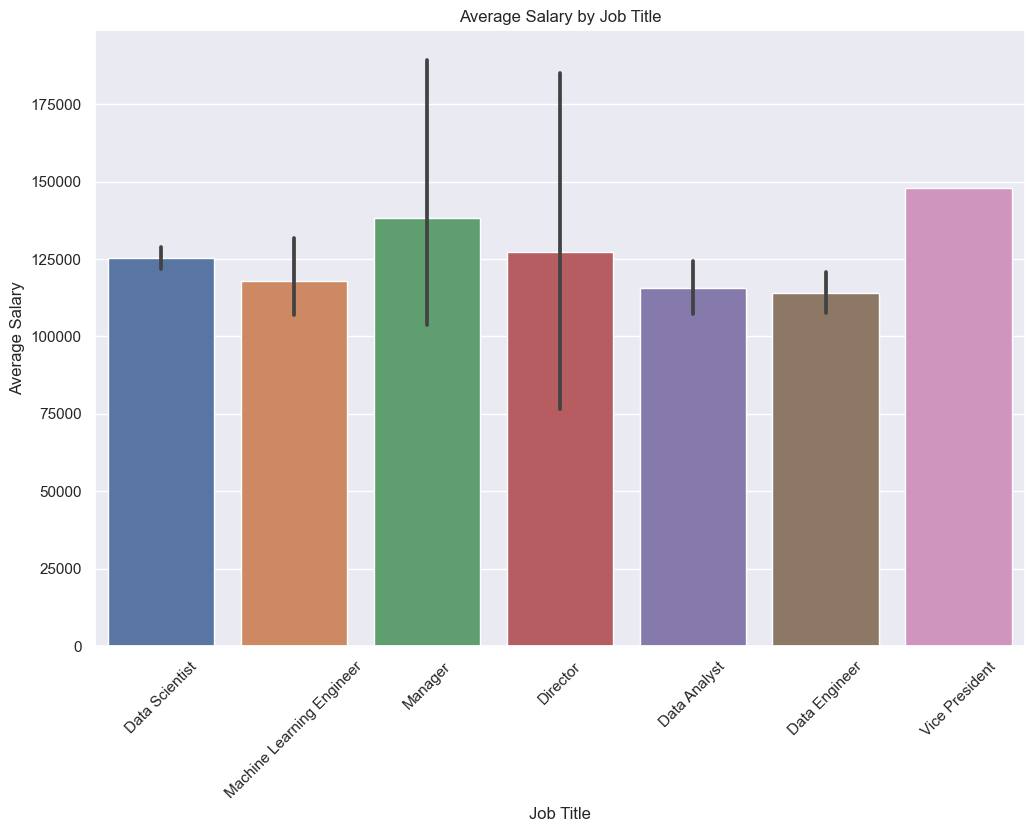

In [62]:
plot_average_salary_by_title(ds_vis_df)

#### What sort of conclusions can be drawn from this graph?  Jot some down.

Now let us look at the average salary by job state.

In [63]:
def plot_average_salary_by_job_state(df, n=10):
    top_states = df.groupby('Job State')['Average Salary'].mean().nlargest(n).index
    filtered_data = df[df['Job State'].isin(top_states)]

    plt.figure(figsize=(12, 8))
    sns.barplot(data=filtered_data, x='Average Salary', y='Job State', order=top_states)
    plt.title('Top 10 States by Average Salary')
    plt.xlabel('Average Salary')
    plt.ylabel('State')
    plt.show()

The function plot_average_salary_by_location takes a DataFrame (df) as input.

* The bar plot is created using `sns.barplot()` from Seaborn.
* The x parameter is set to 'Average Salary' to specify the column for the average salary values, and the y parameter is set to 'Location' to specify the column for the job locations.
* The figure size, title, x-label, and y-label are added to provide context.
* Finally, the plot is displayed using `plt.show()`.

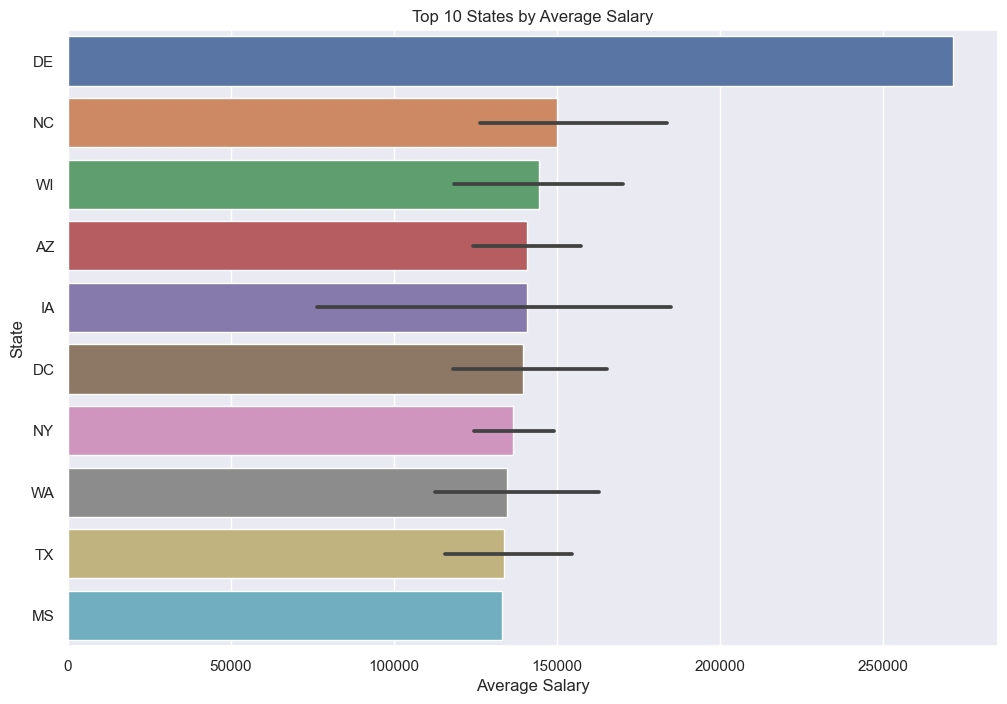

In [64]:
plot_average_salary_by_job_state(ds_vis_df)

What kinds of conclusions can be drawn from the graph?  Jot some down.

In [65]:
def plot_average_salary_by_size(data):
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=data, x='Size', y='Average Salary', order=['1 to 50', '51 to 200', '201 to 500', '501 to 1000', '1001 to 5000', '5001 to 10000', '10000+'])
    plt.title('Average Salary by Company Size')
    plt.xlabel('Company Size')
    plt.ylabel('Average Salary')
    plt.xticks(rotation=45)
    plt.show()

The function plot_average_salary_by_size takes the dataset (data) as input.

* The bar plot is created using sns.boxplot() from Seaborn, with the x parameter set to 'Size' to specify the column for company size, and the y parameter set to 'Average Salary' to specify the column for average salary.
* The order parameter is set to specify the desired order of company sizes for better visualization.
* The figure size, title, x-label, and y-label are set accordingly.
* The rotation parameter is used to rotate the x-axis labels for better readability.
* Finally, the plot is displayed using `plt.show()`.

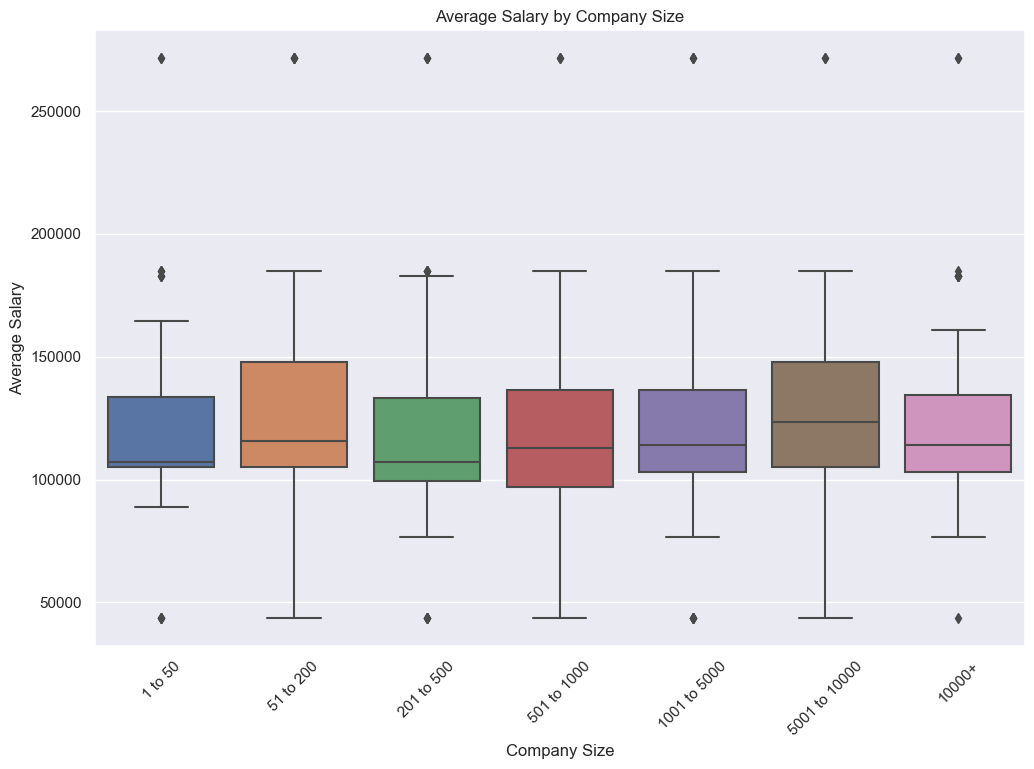

In [66]:
plot_average_salary_by_size(ds_vis_df)

There are unlimited ways to visualize this data and draw conclusions from the data set.  These are just some samples of graphs that can be created using the cleaned up data set.  Take the time to practice some on your own and develop your own analysis!